In [1]:
import pandas as pd
import numpy as np

In [2]:
headers = ['target', 'id', 'date', 'flag', 'user', 'text']

target: the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)

ids: The id of the tweet ( 2087)

date: the date of the tweet (Sat May 16 23:58:44 UTC 2009)

flag: The query (lyx). If there is no query, then this value is NO_QUERY.

user: the user that tweeted (robotickilldozr)

text: the text of the tweet (Lyx is cool)

In [3]:
data = pd.read_csv('datasets/twitter_sentiment/training.1600000.processed.noemoticon.csv',
                    encoding='latin-1', names=headers)

**Exploratory Data Analysis (EDA)**

In [4]:
data.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
data.drop(['flag', 'date', 'id', 'user'], axis=1, inplace=True)

In [6]:
data.head()

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   text    1600000 non-null  object
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In [8]:
data.text.describe()

count                       1600000
unique                      1581466
top       isPlayer Has Died! Sorry 
freq                            210
Name: text, dtype: object

In [9]:
data.target.value_counts()

0    800000
4    800000
Name: target, dtype: int64

### Text Preprocessing

<Axes: xlabel='target', ylabel='count'>

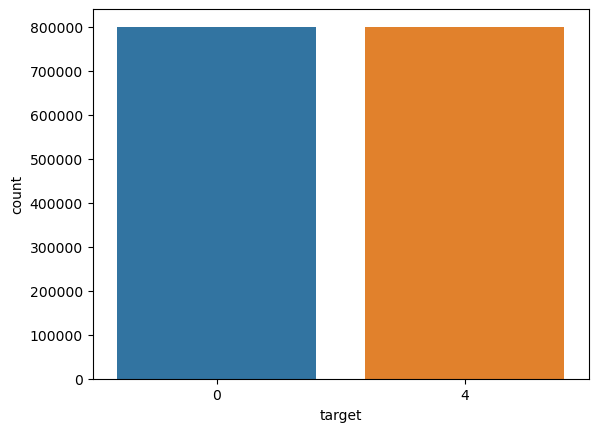

In [10]:
import seaborn as sns
sns.countplot(x='target', data=data)

In [11]:
texts = data

**Removal of username mentions**

In [12]:
import re

In [13]:
def remove_twitter_mentions(text):
    cleaned_text = re.sub(r'@\w+\s?', '', text)
    return cleaned_text.strip()

In [14]:
texts['text_clean'] = texts.text.apply(lambda text: remove_twitter_mentions(text))

In [15]:
texts.head()

,target,text,text_clean
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","http://twitpic.com/2y1zl - Awww, that's a bumm..."
1,0,is upset that he can't update his Facebook by ...,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...,I dived many times for the ball. Managed to sa...
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....","no, it's not behaving at all. i'm mad. why am ..."


**Removal of URLs**

In [16]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

In [17]:
texts['text_clean'] = texts['text_clean'].apply(lambda text: remove_urls(text))

In [18]:
texts.head()

,target,text,text_clean
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","- Awww, that's a bummer. You shoulda got Dav..."
1,0,is upset that he can't update his Facebook by ...,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...,I dived many times for the ball. Managed to sa...
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....","no, it's not behaving at all. i'm mad. why am ..."


**Lower Casing**

In [19]:
texts['text_clean'] = texts['text_clean'].str.lower()

In [20]:
texts.head()

,target,text,text_clean
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","- awww, that's a bummer. you shoulda got dav..."
1,0,is upset that he can't update his Facebook by ...,is upset that he can't update his facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball. managed to sa...
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....","no, it's not behaving at all. i'm mad. why am ..."


**Removal of Punctuations**

In [21]:
import string

In [22]:
PUNCT_TO_REMOVE = string.punctuation
def remove_punc(text):
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

In [23]:
texts['text_clean'] = texts['text_clean'].apply(lambda text: remove_punc(text))

In [24]:
texts.head()

,target,text,text_clean
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww thats a bummer you shoulda got david c...
1,0,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...
2,0,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sav...
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i her...


**Removal of stopwords**

In [25]:
from nltk.corpus import stopwords

In [26]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

In [27]:
texts['text_clean'] = texts['text_clean'].apply(lambda text: remove_stopwords(text))

In [28]:
texts.head()

,target,text,text_clean
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww thats bummer shoulda got david carr third...
1,0,is upset that he can't update his Facebook by ...,upset cant update facebook texting might cry r...
2,0,@Kenichan I dived many times for the ball. Man...,dived many times ball managed save 50 rest go ...
3,0,my whole body feels itchy and like its on fire,whole body feels itchy like fire
4,0,"@nationwideclass no, it's not behaving at all....",behaving im mad cant see


**Removal of numbers**

In [29]:
def remove_numbers(text):
    number_pattern = r'\d+'
    without_number = re.sub(pattern=number_pattern, repl=" ", string=text)
    return without_number

In [30]:
texts['text_clean'] = texts['text_clean'].apply(lambda text: remove_numbers(text))

In [31]:
texts.head()

,target,text,text_clean
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww thats bummer shoulda got david carr third...
1,0,is upset that he can't update his Facebook by ...,upset cant update facebook texting might cry r...
2,0,@Kenichan I dived many times for the ball. Man...,dived many times ball managed save rest go b...
3,0,my whole body feels itchy and like its on fire,whole body feels itchy like fire
4,0,"@nationwideclass no, it's not behaving at all....",behaving im mad cant see


**Removal of Frequent words**

In [32]:
from collections import Counter
cnt = Counter()

In [ ]:
for text in messages['text_clean'].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common()

In [ ]:
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

messages['text_clean'] = messages['text_clean'].apply(lambda text: remove_freqwords(text))

In [ ]:
messages.head()

**Removal of Rare words**

In [ ]:
n_rare_words = 10
RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])
def remove_rarewords(text):
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])

messages['text'] = messages['text'].apply(lambda text: remove_rarewords(text))

In [ ]:
messages.head()

**Removal of extra whitespaces**

In [33]:
def remove_extra_white_spaces(text):
    single_char_pattern = r'\s+[a-zA-Z]\s+'
    without_sc = re.sub(pattern=single_char_pattern, repl=" ", string=text)
    return without_sc

In [34]:
texts['text_clean'] = texts['text_clean'].apply(lambda x: remove_extra_white_spaces(x))

In [35]:
texts.head()

,target,text,text_clean
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww thats bummer shoulda got david carr third...
1,0,is upset that he can't update his Facebook by ...,upset cant update facebook texting might cry r...
2,0,@Kenichan I dived many times for the ball. Man...,dived many times ball managed save rest go b...
3,0,my whole body feels itchy and like its on fire,whole body feels itchy like fire
4,0,"@nationwideclass no, it's not behaving at all....",behaving im mad cant see


**Stemming**

In [36]:
from nltk.stem.porter import PorterStemmer

In [37]:
stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

In [38]:
texts['text_clean'] = texts['text_clean'].apply(lambda text: stem_words(text))

In [39]:
texts.head()

,target,text,text_clean
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww that bummer shoulda got david carr third day
1,0,is upset that he can't update his Facebook by ...,upset cant updat facebook text might cri resul...
2,0,@Kenichan I dived many times for the ball. Man...,dive mani time ball manag save rest go bound
3,0,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
4,0,"@nationwideclass no, it's not behaving at all....",behav im mad cant see


**Lemmatizing**

In [40]:
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize

In [41]:
def lemmatizing(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    for i in range(len(tokens)):
        lemma_word = lemmatizer.lemmatize(tokens[i])
        tokens[i] = lemma_word
    return " ".join(tokens)

In [42]:
texts['text_clean'] = texts['text_clean'].apply(lambda x: lemmatizing(x))

In [43]:
texts.head()

,target,text,text_clean
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww that bummer shoulda got david carr third day
1,0,is upset that he can't update his Facebook by ...,upset cant updat facebook text might cri resul...
2,0,@Kenichan I dived many times for the ball. Man...,dive mani time ball manag save rest go bound
3,0,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
4,0,"@nationwideclass no, it's not behaving at all....",behav im mad cant see


**Data Splitting**

In [45]:
X = texts.text_clean
y = texts.target

In [46]:
from sklearn.feature_extraction.text import CountVectorizer

In [47]:
cv = CountVectorizer()
X = cv.fit_transform(X)

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

**Model Training with Logistic Regression**

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
reg = LogisticRegression()

reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

C:\Users\Akram\miniconda3\envs\nlp\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Classification report**

In [59]:
from sklearn.metrics import classification_report, confusion_matrix

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.76      0.77    159646
           4       0.77      0.80      0.78    160354

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



In [61]:
print(confusion_matrix(y_test, y_pred))

[[120662  38984]
 [ 32458 127896]]


Text(0.5, 427.9555555555555, 'Predicted label')

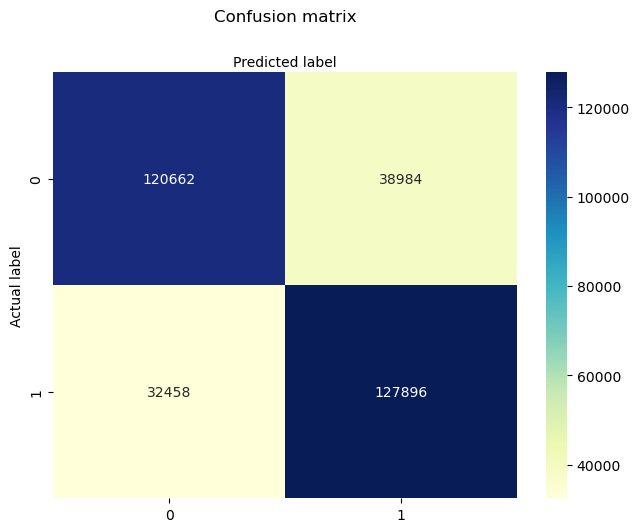

In [64]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')